In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import bitstring
import matplotlib as mpl

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Bitstream Vera Sans",
#    "font.sans-serif": "Helvetica",
})

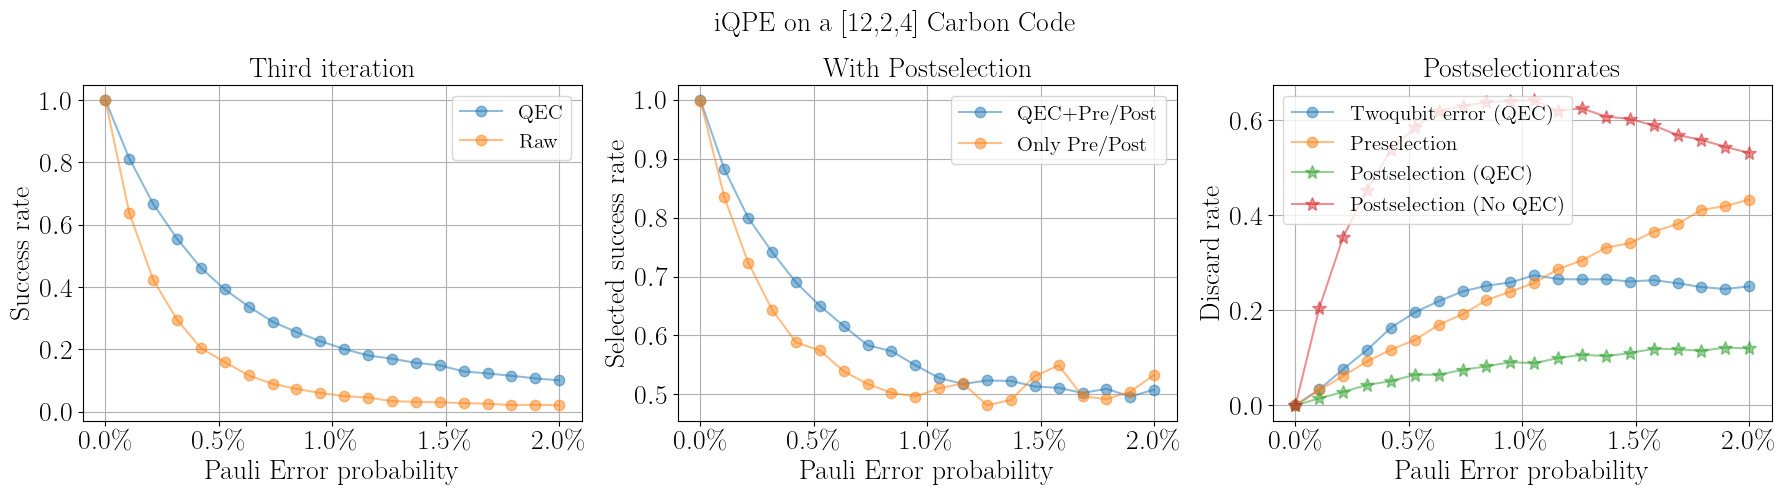

In [ ]:
x,pre,post,nn,ne,en,ee,pre2,two,post2,nn2,ne2,en2,ee2 = np.loadtxt("text/FTCarbon_3rd_a.txt", delimiter = ",")       #qec_ideal auf beiden qubits zusätzlich nach dem encoding im vgl. zu b)

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    y_no_QEC_PS.append((ne[i]+nn[i])/(ne[i]+nn[i]+ee[i]+en[i]))
    y_PS.append((ne2[i]+nn2[i])/(ne2[i]+nn2[i]+ee2[i]+en2[i]))

y = [sum(i) for i in zip(ne,nn)]
y_qec = [sum(i) for i in zip(ne2,nn2)]


ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.plot(x,y, label="Raw", marker = ".",markersize = 15, alpha = 0.5)

ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 15,  alpha = 0.5)
ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, two , label="Twoqubit error (QEC)", marker = ".",markersize = 15, alpha = 0.5)
ax4.plot(x, pre2, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
ax4.plot(x, post2, label="Postselection (QEC)", marker = "*",markersize = 10, alpha = 0.5)
ax4.plot(x, post, label="Postselection (No QEC)", marker = "*",markersize = 10, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("Third iteration", fontsize=20)
ax2.set_title("With Postselection", fontsize=20)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Postselectionrates", fontsize=20)
ax1.set_xlabel("Pauli Error probability", fontsize=20)
ax2.set_xlabel("Pauli Error probability", fontsize=20)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=20)
ax1.set_ylabel("Success rate", fontsize=20)
ax2.set_ylabel("Selected success rate", fontsize=20)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=15)
fig.suptitle('iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTCarbon1.png", dpi = 200)
plt.show()